In [6]:
#Task 4: Classification with Logistic Regression.
#1.Choose a binary classification dataset.
#2.Train/test split and standardize features.
#3.Fit a Logistic Regression model.
#4.Evaluate with confusion matrix, precision, recall, ROC-AUC.
#5.Tune threshold and explain sigmoid function.

In [7]:
# Logistic Regression Binary Classifier (Housing Dataset)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [8]:
# 1. Load and prepare datase
df = pd.read_csv("Housing.csv")

In [9]:

# Create binary target: expensive (>= median price)
median_price = df["price"].median()
df["expensive"] = (df["price"] >= median_price).astype(int)


In [10]:

# Drop original price column (since we now use binary target)
df = df.drop(columns=["price"])


In [11]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
# 2. Train-test split

X = df.drop("expensive", axis=1)
y = df["expensive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [25]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# 3. Fit Logistic Regression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [27]:
# 4. Evaluation

y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]


In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[68 13]
 [18 65]]


In [29]:
# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        81
           1       0.83      0.78      0.81        83

    accuracy                           0.81       164
   macro avg       0.81      0.81      0.81       164
weighted avg       0.81      0.81      0.81       164



In [30]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9297932470623234


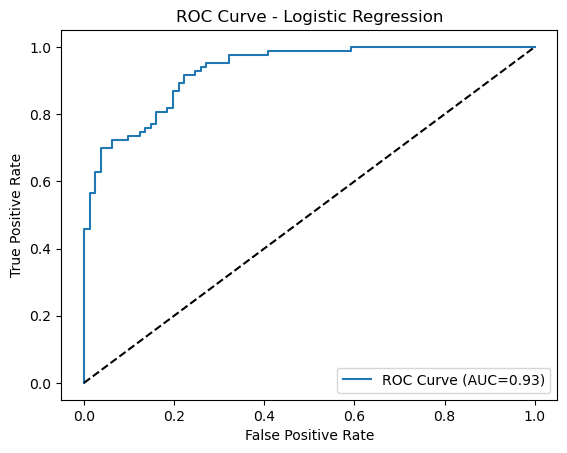

In [31]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [32]:
# 5. Threshold Tuning

threshold = 0.6  # Example: classify as expensive if prob >= 0.6
y_pred_custom = (y_pred_prob >= threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"\nConfusion Matrix with threshold={threshold}:\n", cm_custom)



Confusion Matrix with threshold=0.6:
 [[73  8]
 [23 60]]


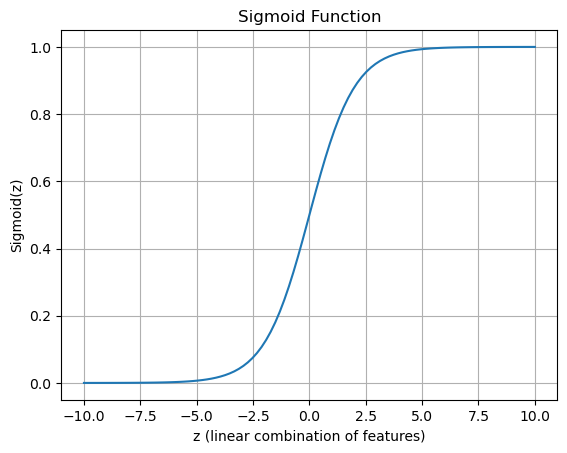

In [33]:
# 6. Sigmoid Function Explanation

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z (linear combination of features)")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()
